In [116]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt

# Step 4

In [117]:
asset=yf.download('BRK-A',start='2000-01-01',end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [118]:
unemp_rate=pdr.get_data_fred('UNRATE',start='2000-01-01')
default_rate=pdr.get_data_fred('DRCCLACBS',start='2000-01-01')

# Step 5

In [119]:
# Join data 
df=pd.concat([unemp_rate,default_rate],axis=1).dropna()

Text(0, 0.5, '%')

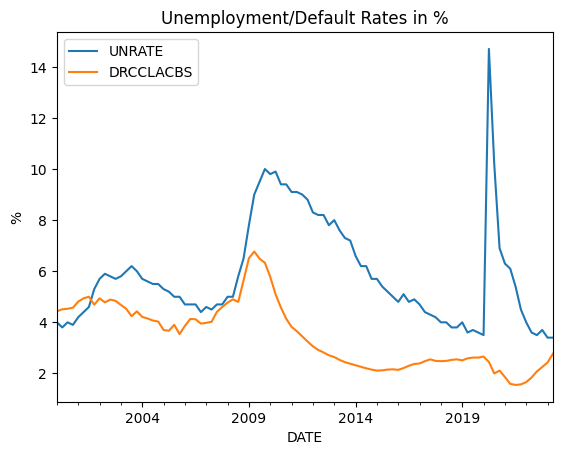

In [120]:
df.plot(title='Unemployment/Default Rates in %')
plt.ylabel('%')

Unemployment rates and default rates follow each other closely

In [121]:
(df['UNRATE'].rolling(5).corr(df['DRCCLACBS'])).mean()

0.1654951806826203

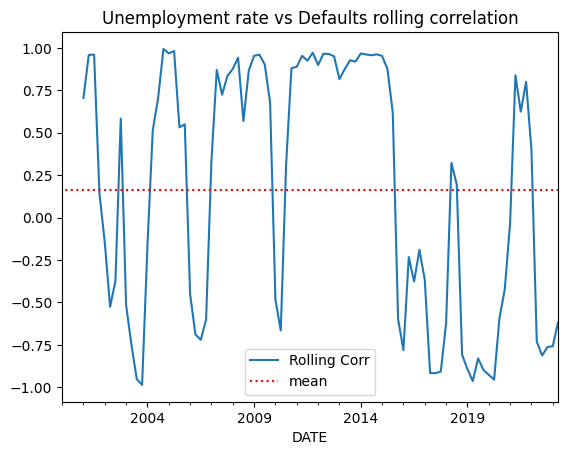

In [122]:
df['UNRATE'].rolling(5).corr(df['DRCCLACBS']).plot(title='Unemployment rate vs Defaults rolling correlation',
                                                   label='Rolling Corr')
plt.hlines((df['UNRATE'].rolling(5).corr(df['DRCCLACBS'])).mean(),xmin=0,xmax=df.index[-1],
           linestyle='dotted',
           colors='red',
           label='mean')
plt.legend()

On average, strong correlation on the rolling basis is not present.

Text(0.5, 1.0, 'Default Rate Autocorrelation')

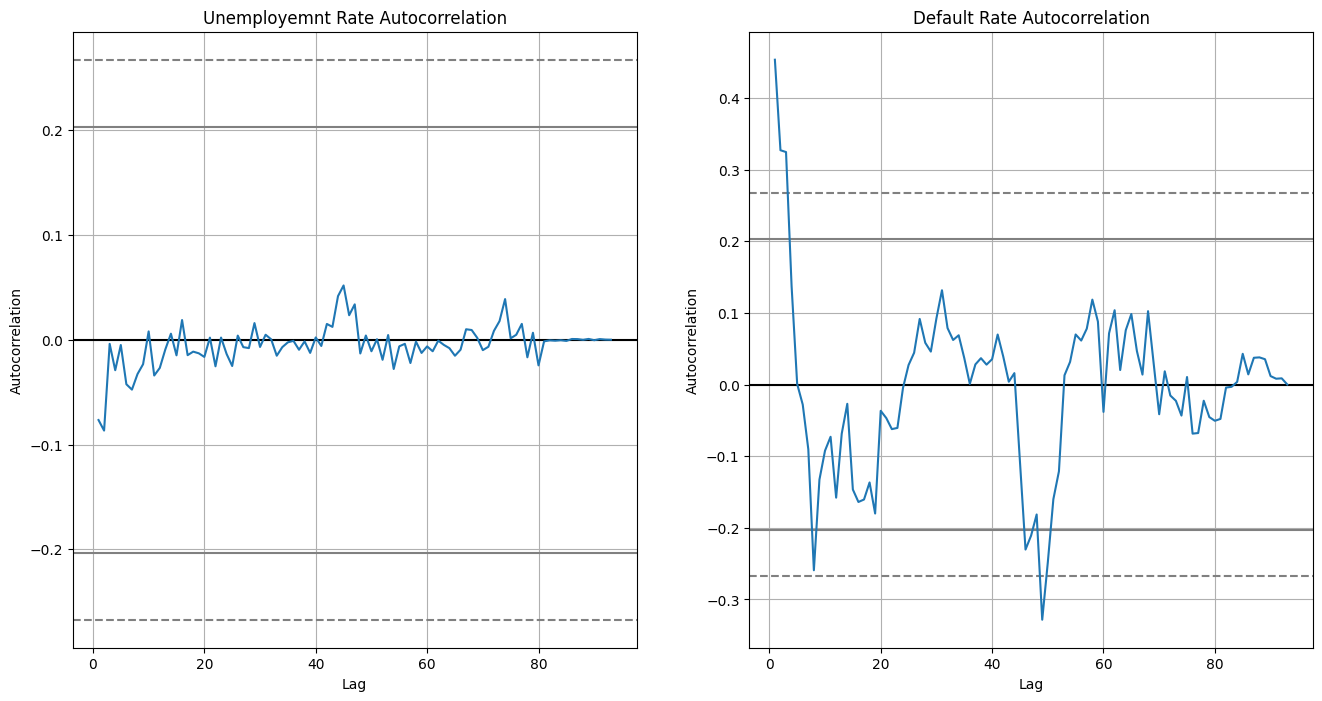

In [123]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
pd.plotting.autocorrelation_plot(df.pct_change().dropna().iloc[:,0],ax=ax[0])
pd.plotting.autocorrelation_plot(df.pct_change().dropna().iloc[:,1],ax=ax[1])
ax[0].set_title('Unemployemnt Rate Autocorrelation')
ax[1].set_title('Default Rate Autocorrelation')

% changes in Unemployment rate are not predictive of the next period changes.  

% Changes in Default Rates are have some predictive power for the default rates in the next period.

# Step 6

In [124]:
# Resample to monthly frequency
asset_avg_volume=asset.resample('1M').mean()['Volume']

In [125]:
# Change index to align with unemployment
asset_avg_volume.index=asset_avg_volume.index+dt.timedelta(1)

In [126]:
merged=pd.concat([unemp_rate,asset_avg_volume],axis=1)

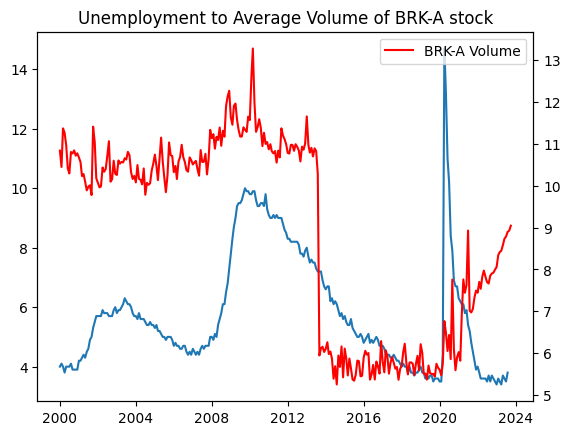

In [127]:
_,ax=plt.subplots()
ax1=ax.twinx()

ax.plot(merged.iloc[:,0])
ax1.plot(np.log(merged.iloc[:,1]),c='red',label='BRK-A Volume')
ax.set_title('Unemployment to Average Volume of BRK-A stock')
plt.legend()

Unemployment rate does not have a noticeable impact on the average volume of Berkshire stock traded.